In [1]:
import os
import sys
dir_path = os.getcwd()
print("The directory of this script is:", dir_path)
root_path = os.path.dirname(dir_path)
sys.path.append(root_path)
print("The root directory is:", root_path)

The directory of this script is: c:\Users\HP\Desktop\Projects\Subscription-Churn-Prediction\notebooks
The root directory is: c:\Users\HP\Desktop\Projects\Subscription-Churn-Prediction


In [2]:
import pandas as pd
data = pd.read_csv(f"{root_path}\data\Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
for col in data.columns:
    if col == "customerID":
        continue
    print(data[col].value_counts(dropna=False, normalize=True))
    print("-"*40)

gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64
----------------------------------------
SeniorCitizen
0    0.837853
1    0.162147
Name: proportion, dtype: float64
----------------------------------------
Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64
----------------------------------------
Dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64
----------------------------------------
tenure
1     0.087037
72    0.051399
2     0.033792
3     0.028397
4     0.024989
        ...   
28    0.008093
39    0.007951
44    0.007241
36    0.007099
0     0.001562
Name: proportion, Length: 73, dtype: float64
----------------------------------------
PhoneService
Yes    0.903166
No     0.096834
Name: proportion, dtype: float64
----------------------------------------
MultipleLines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: proportion, dtype: float64
-----------------------

In [4]:
X = data.drop("Churn", axis=1)
X = pd.get_dummies(X, drop_first=True)
y = data["Churn"]


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = DecisionTreeClassifier(random_state=42, splitter="best", max_depth=5)
clf.fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.794180269694819


In [78]:
print("Tree depth:", clf.get_depth())
print("Number of leaves:", clf.get_n_leaves())
print("Total nodes:", clf.tree_.node_count)

Tree depth: 5
Number of leaves: 31
Total nodes: 61


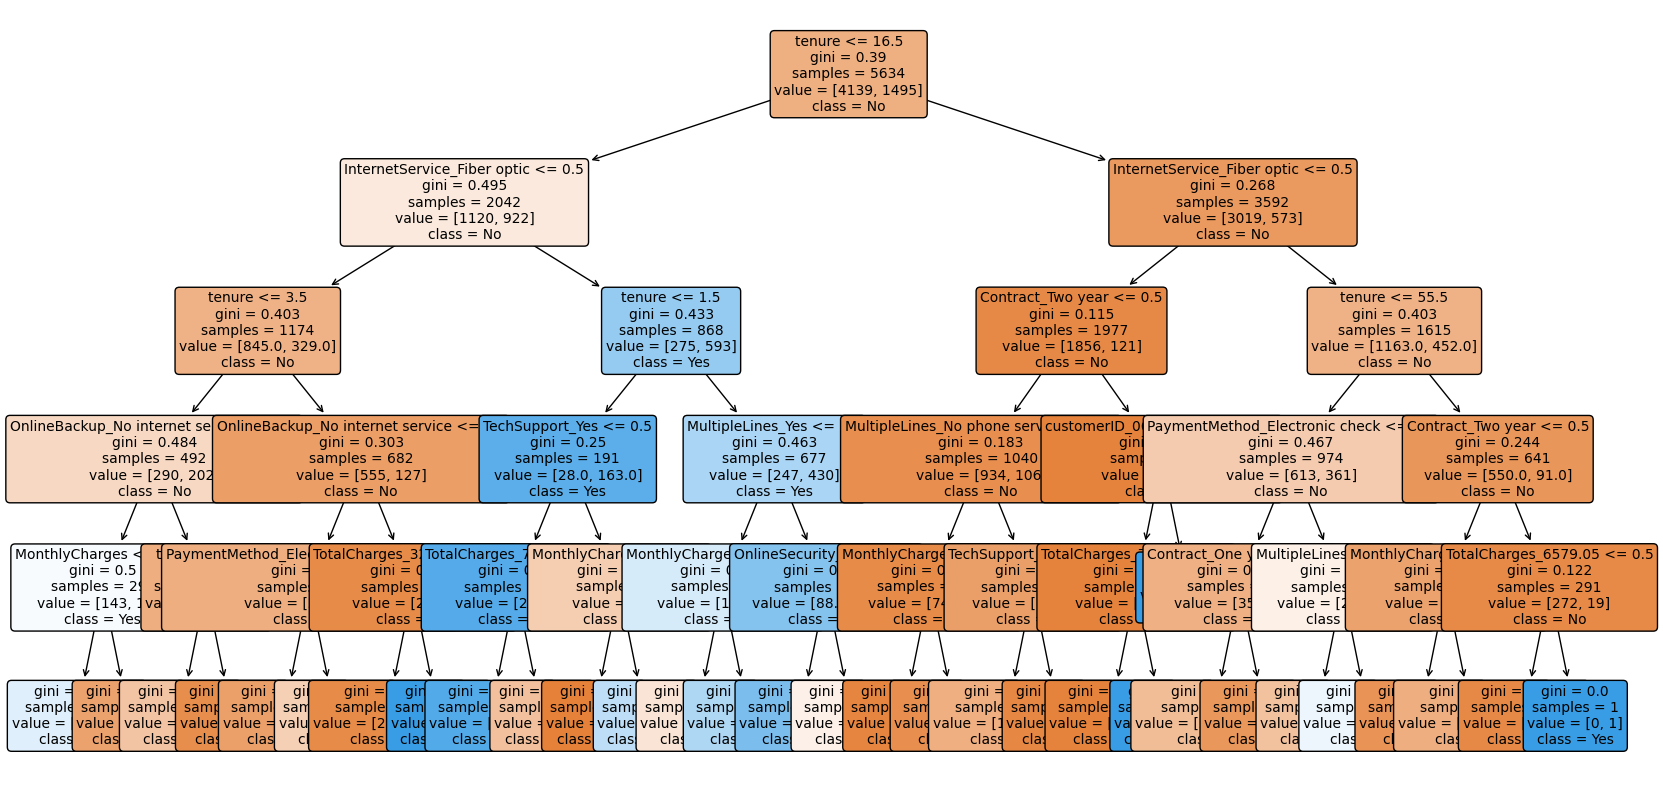

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()